# Geometria rekurencji

Rekurencja - wsio co powraca w siebie. Na przykład stany nieustalone **nie są**.

### Hierarchia rekurencji
1. Najprostszy - punkt stały. Z x do x do x do x do x. Dzieli się na dwa rodzaje, jak w oscylatorach harmonicznych
    1. Zbieganie wykładnicze do 0: gdy punkt jest drenem
    2. Zbieganie oscylujące wokół zero (gdy punkt jest stabilnym ogniskiem)
    * Ważne - niestabilne punkty stałe też są rekurencyjne! Bez zaburzeń pozostają stałe.
2. Ruch periodyczny (cykl graniczny) stabilny lub nie: zamknięta krzywa w przestrzeni fazowej 2D
3. Kwaziperiodyczność: niewspółmierne częstości, ruch po torusie w przestrzeni fazowej. w widmie mocy na składowych częstotliwościach. Ciężko to analizować Fourierem, bo Fourier daje nam iloczyny, sumy, różnice częstości głównych.
4. Ruch chaotyczny (na dziwnym atraktorze - w sensie na pewnym zbiorze punktów w przestrzeni fazowej). Nie jest ani periodyczny, ani kwaziperiodyczny.
Charakterystyczne dla tych układów: wykładnicze rozbieganie się trajektorii o wspólnym zbliżonym punkcie początkowych.
Ciężko to wykryć matematycznie\numerycznie! Złapiemy jeden punkt i z niego zrobimy jedną trajektorię. Jak wykryć **wszystkie**?

### Dynamiczna stabilność trajektorii
Pytanie: czy to co mamy, to jest nadal stan nieustalony, czy już atraktor?

Często dla ruchu po 1,2,3,4D przestrzeni fazowej można zlinearyzować równania ruchu. Ale nie da się ich scałkować po całej trajektorii aż wrócimy do punktu początkowego, bo to przybliżenie działa jedynie lokalnie.

Ogólnie: bardzo ciężko zdefiniować matematycznie dla ruchu chaotycznego stabilność.

Przykład: atraktor Lorentza: siodło hiperboliczne w środku, dwa niestabilne ogniska po bokach

**stabilność strukturalna** - zamiast dynamicznej (wygasające zaburzenia punktów początkowych) - dla zmiany parametrów o $\epsilon$ dostajemy podobny kształt atraktora. Patrz: Lorentz, R = {25, 27, 30}. Kontrprzykład: mapa logistyczna powyżej punktu akumulacji (gęsto upakowane okna periodyczne).

# Geometria bifurkacji (w równaniach różniczkowych czy też przepływach)

* Bifurkacja lokalna: opisuje zachowanie blisko jakiegoś punktu, np. utrata stabilności przez punkt stały. **saddle-node bifurcation** najlepszym przykładem (zbliżanie się hiperboli w dół do $x_{n+1}=x_n$. Dla przypomnienia: siodłowy, bo ma dwa zbieżne i dwa rozbieżne kierunki.
TODO: ![zdjęcie - punkt siodłowy w górach]

* Kolejny przykład: bifurkacja Hopfa w oscylatorze van der Pola (z nieliniowym tłumieniem $x^2-1$)

$$\ddot{x} + \mu (x^2 -1 ) \dot{x} + \omega^2 x = 0$$

In [1]:
def vdp_oscillator(r, t, mu, omega):
    x, v = r
    return np.array([v, -mu*(x*x-1) - omega**2 * x])

#test_trajectories(vdp_oscillator, 1, 100, 0.3, 1, 1)

NameError: name 'test_trajectories' is not defined

* Katastrofy bezpieczne i niebezpieczne (*subcritical, supercritical*) - bezpieczna ma ciągłe przejście od stabilności do niestabilności gałęzi, niebezpieczna - nieciągłe

Oscylator Duffinga: oscylacja między dwoma przyciągającymi się minimami. Podejrzanie podobne jak rezonans stochastyczny. Ma globalne bifurkacje! Do prawego minimum prowadzą obszary, które rozmieszczone są wymiennie (jak ciasto) z obszarami prowadzącymi w lewe minimum. Te obszary mają gładkie krawędzie. Nie musiałyby mieć! Mogą być fraktalne!

In [8]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

m = 1
c = 0.1 #tlumienie
a = 1
b = 1

def duffing(r, t, m, c, a, b):
    x, v = r
    return np.array([v, (-c*v + a*x - b*x**3)/m])


def test_trajectories(derivative, max_start, N, alpha, *params):
    t = np.linspace(0, 20, 2000)
    plt.figure(figsize=(10,10))
    for i in range(N):
        r0 = max_start*2*(np.random.random(2)-0.5)
        r = odeint(derivative, r0, t, args = params)
        x, v = r.T
        if derivative == duffing:
            if x[-1] > 0:
                fmt = "b-"
            else:
                fmt = "r-"
        else:
            fmt = "k-"
        plt.plot(x, v, fmt, alpha = alpha)
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("v")

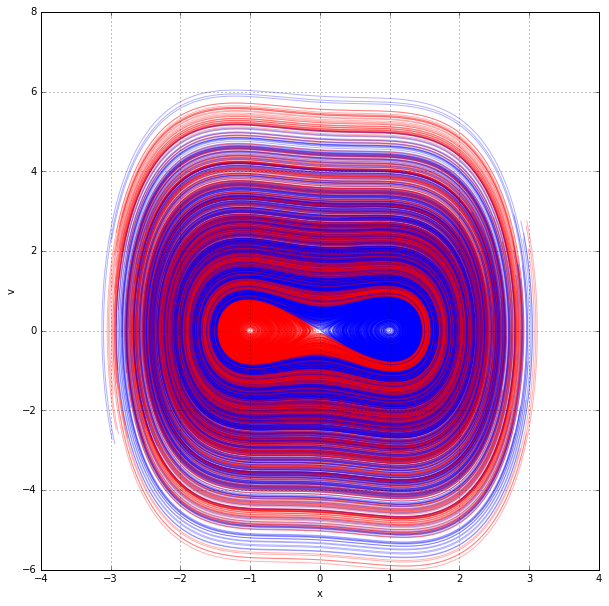

In [9]:
test_trajectories(duffing, 3, 750, 0.3, m, c, a, b)

Dygresja: analiza stabilności statków, wzięta właśnie z tego pola

In [10]:
### Lorentz, R < 1
from mpl_toolkits.mplot3d import Axes3D

def test_trajectories_3d(derivative, max_start, N, alpha, *params):
    t = np.linspace(0, 20, 2000)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(N):
        r0 = max_start*2*(np.random.random(3)-0.5)
        r = odeint(derivative, r0, t, args = params)
        x, y, z, = r.T
        if derivative == duffing:
            if x[-1] > 0:
                fmt = "b-"
            else:
                fmt = "r-"
        else:
            fmt = "k-"
        ax.plot(x, y, z, fmt, alpha = alpha)
    ax.grid()
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")

def lorenz(r, t, sigma, R, b):
    x, y, z = r
    return np.array([sigma*(y-x), x*(R-z)-y, x*y-b*z])
"""globalna bifurkacja w r=1: od punktu stałego stabilnego z silnym przyciąganiem w pionie,
słabiutkim w poziomie, do tylko przyciągania w pionie w r=1, do dwóch punktów stałych u boków
w r > 1

przykład bifurkacji niehiperbolicznej!"""
N = 70

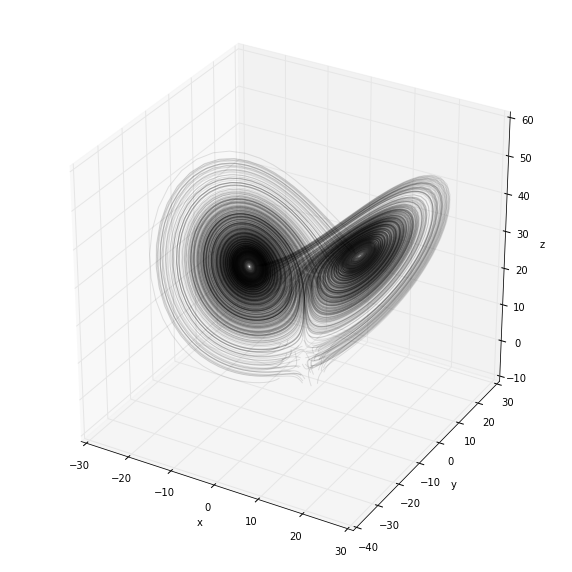

In [11]:
test_trajectories_3d(lorenz, 5, N, 0.1, 10, 28, 8/3)

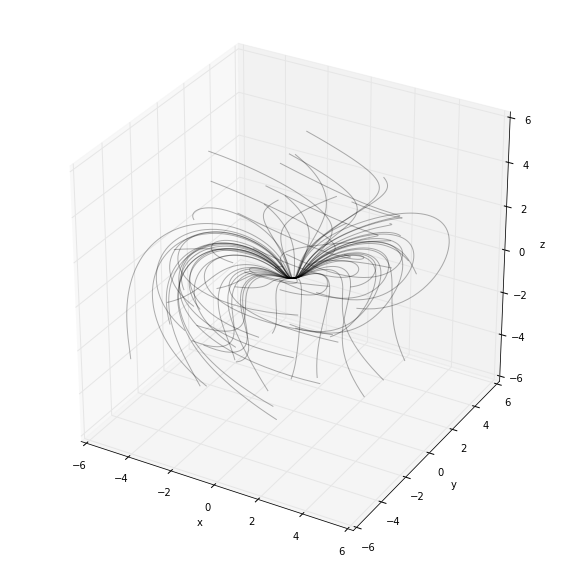

In [16]:
test_trajectories_3d(lorenz, 5, N, 0.3, 10, 0.1, 8/3)

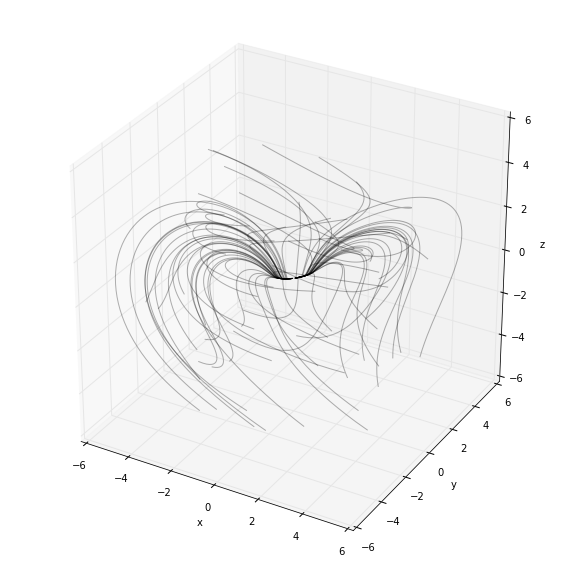

In [12]:
test_trajectories_3d(lorenz, 5, N, 0.3, 10, 0.9, 8/3)

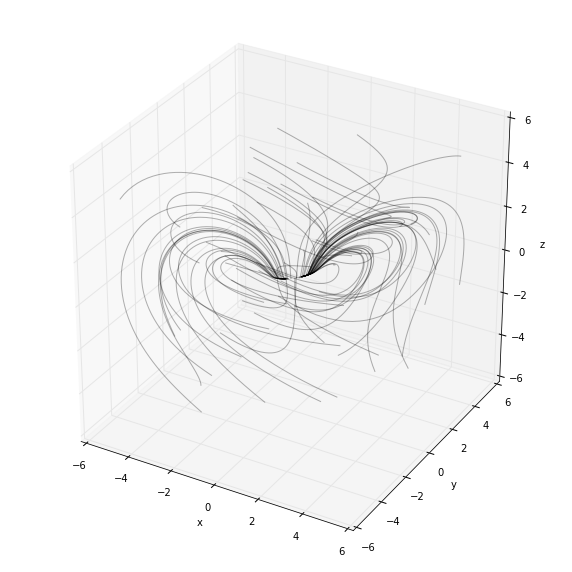

In [13]:
test_trajectories_3d(lorenz, 5, N, 0.3, 10, 1, 8/3)

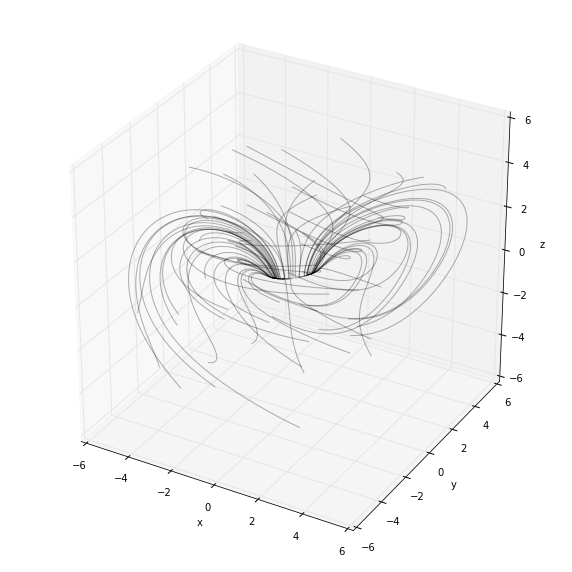

In [14]:
test_trajectories_3d(lorenz, 5, N, 0.3, 10, 1.1, 8/3)

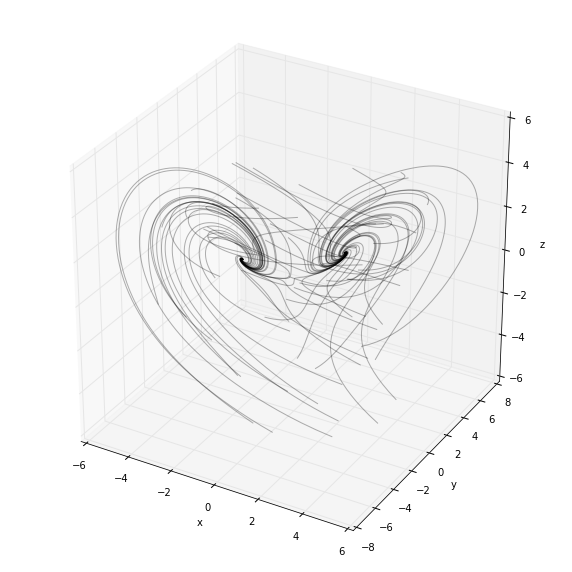

In [15]:
test_trajectories_3d(lorenz, 5, N, 0.3, 10, 2, 8/3)

Lokalno-globalna bifurkacja Vanderpola z wymuszeniem. Przekrój stroboskopowy.

**pierścień dryfu**

Intermitencja: trajektorie zbierają się wokół punktu bifurkacji

Dla A = 0.6125 przekrój staje się punktem - kolaps krzywej do punktu!

In [ ]:
def vdp_oscillator_forcing(r, t, mu, omega, A, omega_f):
    x, v = r
    return np.array([v, -mu*(x*x-1) - omega**2 * x + A*np.sin(omega_f*t)])

#test_trajectories(vdp_oscillator_forcing, 1, 100, 0.3, 1, 1, 1, 1)

## Katastrofa intermitencyjna
(ten kolaps z krzywej do punktu)

Rekurencyjne powroty (kolejne punkty na strobie) nie są dla VPD z forcing blisko siebie, a są rozłożone dalej od siebie. To lata po całej przestrzeni.

Objętość atraktora zmienia się po saddle-node bifurcation. Tylko te trajektorie, które przechodziły przez punkt zderzenia mogą być jakkolwiek przedłużone - reszta gwałtownie umyka na przedłużalne.


**Omega explosion \m/** - zderzenie punktu stałego i siodła, nagle znika siodło i pojawia się jedynie cykl graniczny
** Blue sky catastrophe!!!**